In [25]:
# load the packages
import xarray as xr
import pandas as pd
import numpy  as np
from ipynb.fs.full.Untitled2 import save_netcdf
import os
import shutil
import matplotlib
font = {'family' : 'Times New Roman',
            'weight' : 'bold',
            'size'   : 40}
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt


# load the streamflow at saskatoon
streamflow_at_Saskatoon = pd.read_csv('../data/final_ensemble.csv')
streamflow_at_Saskatoon = streamflow_at_Saskatoon.drop(columns = 'Unnamed: 0')
streamflow_at_Saskatoon ['date'] = pd.date_range('2013-06-01','2013-07-10')
streamflow_at_Saskatoon = streamflow_at_Saskatoon.set_index('date')

# load storage at Diefenbaker
storage_at_Diefenbaker = pd.read_csv('../data/Storage_ensemble_Scenarios.csv')
storage_at_Diefenbaker ['Date'] = pd.DatetimeIndex(storage_at_Diefenbaker ['Date'])
storage_at_Diefenbaker = storage_at_Diefenbaker.set_index('Date')

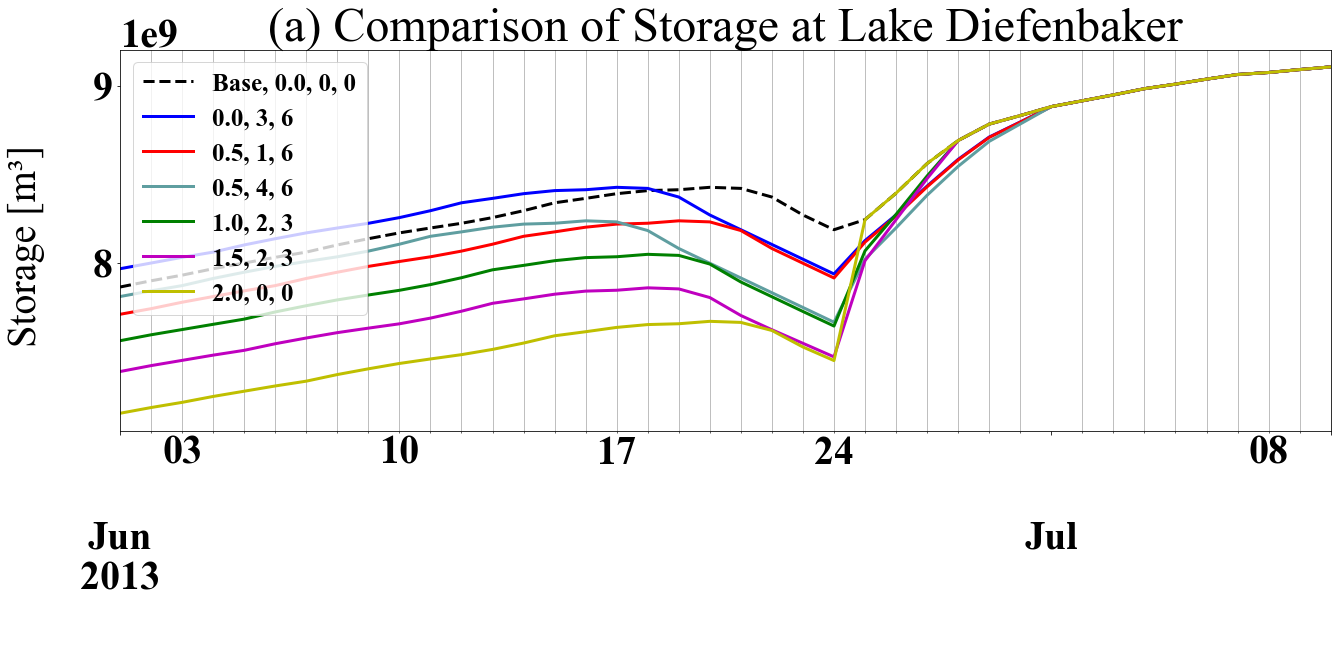

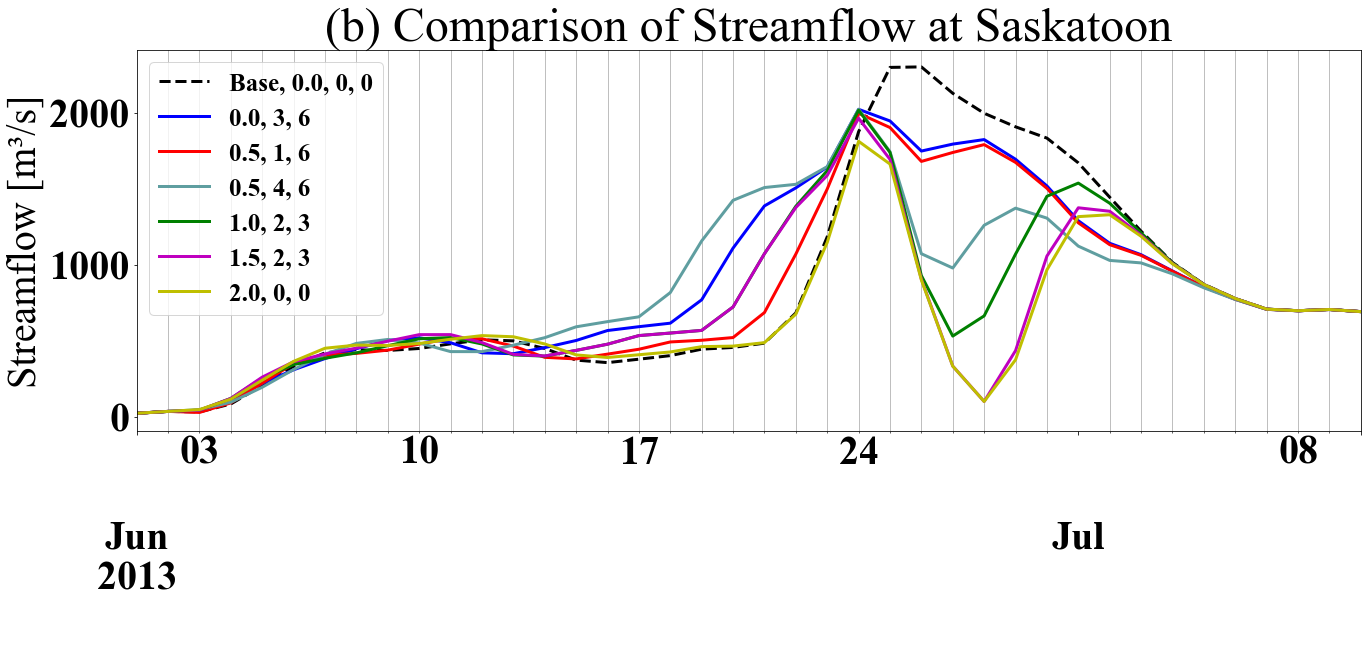

In [27]:
# fig 


fig, ax = plt.subplots(figsize=(20,10))


# storages
storage_at_Diefenbaker['Scenario_00_0_0'].plot(ax = ax,
                                               style = '--k',
                                               linewidth = 3.0,
                                               label = 'Base, 0.0, 0, 0')
storage_at_Diefenbaker['Scenario_00_3_6'].plot(ax = ax,
                                               style = 'b',
                                               linewidth=3.0,
                                               label = '0.0, 3, 6')
storage_at_Diefenbaker['Scenario_05_1_6'].plot(ax = ax,
                                               style = 'r',
                                               linewidth=3.0,
                                               label = '0.5, 1, 6')
storage_at_Diefenbaker['Scenario_05_4_6'].plot(ax = ax,
                                               style = 'cadetblue',
                                               linewidth=3.0,
                                               label = '0.5, 4, 6')
storage_at_Diefenbaker['Scenario_10_2_3'].plot(ax = ax,
                                               style = 'g',
                                               linewidth=3.0,
                                               label = '1.0, 2, 3')
storage_at_Diefenbaker['Scenario_15_2_3'].plot(ax = ax,
                                               style = 'm',
                                               linewidth=3.0,
                                               label = '1.5, 2, 3')
storage_at_Diefenbaker['Scenario_20_0_0'].plot(ax = ax,
                                               style = 'y',
                                               linewidth=3.0,
                                               label = '2.0, 0, 0')
plt.legend(loc='upper left',fontsize = 25)
# ax.axes.get_xaxis().set_visible(False)
plt.grid(which='minor', axis='both')
plt.grid(which='minor', axis='y')

plt.xlim('2013-06-01','2013-07-10')
plt.title('(a) Comparison of Storage at Lake Diefenbaker')
plt.ylabel('Storage [m³] \n  ')
plt.xlabel(' ')
plt.tight_layout()


plt.savefig('../fig/Storage_at_Diefenbaker.jpg', dpi=400)


##########
##########

fig, ax = plt.subplots(figsize=(20,10))

# storages
# storages
streamflow_at_Saskatoon['Volume_00_0_0'].plot(ax = ax,
                                               style = '--k',
                                               linewidth = 3.0,
                                               label = 'Base, 0.0, 0, 0')
streamflow_at_Saskatoon['Volume_00_3_6'].plot(ax = ax,
                                               style = 'b',
                                               linewidth=3.0,
                                               label = '0.0, 3, 6')
streamflow_at_Saskatoon['Volume_05_1_6'].plot(ax = ax,
                                               style = 'r',
                                               linewidth=3.0,
                                               label = '0.5, 1, 6')
streamflow_at_Saskatoon['Volume_05_4_6'].plot(ax = ax,
                                               style = 'cadetblue',
                                               linewidth=3.0,
                                               label = '0.5, 4, 6')
streamflow_at_Saskatoon['Volume_10_2_3'].plot(ax = ax,
                                               style = 'g',
                                               linewidth=3.0,
                                               label = '1.0, 2, 3')
streamflow_at_Saskatoon['Volume_15_2_3'].plot(ax = ax,
                                               style = 'm',
                                               linewidth=3.0,
                                               label = '1.5, 2, 3')
streamflow_at_Saskatoon['Volume_20_0_0'].plot(ax = ax,
                                               style = 'y',
                                               linewidth=3.0,
                                               label = '2.0, 0, 0')
plt.legend(loc='upper left',fontsize = 25)
plt.grid(which='minor', axis='both')
plt.grid(which='minor', axis='y')
plt.xlim('2013-06-01','2013-07-10')
plt.title('(b) Comparison of Streamflow at Saskatoon')
plt.ylabel('Streamflow [m³/s]')
plt.xlabel(' ')

plt.tight_layout()


plt.savefig('../fig/Streamflow_at_Saskatoon.jpg', dpi=400)



In [28]:

# https://stackoverflow.com/questions/30227466/combine-several-images-horizontally-with-python
import sys
from PIL import Image

image_list = ['../fig/Storage_at_Diefenbaker.jpg', '../fig/Streamflow_at_Saskatoon.jpg']

if image_list:
    images = [Image.open(x) for x in image_list]
    widths, heights = zip(*(i.size for i in images))
    max_width = max(widths)
    total_height = sum(heights)
    new_im = Image.new('RGB', (max_width, total_height))
    y_offset = 0
    for im in images:
        new_im.paste(im, (0,y_offset))
        y_offset += im.size[1]
    new_im.save('../fig/Figure_8.png')
 